# Census Income Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from collections import Counter
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print(df.shape)
print(df.dtypes)

(32560, 15)
Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
# to check non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [9]:
# Checking for duplicate values
df.duplicated().sum()

24

In [10]:
# finding unique values
for column in df.columns:
    print(df[column].nunique())

73
9
21647
16
16
7
15
6
5
2
119
92
94
42
2


In [11]:
# to check the object type/categorical data
for column in df.columns:
    if df[column].dtype==object:
        print("{}:{}".format(column,df[column].unique()))

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Marital_status:[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation:[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Relationship:[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race:[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex:[' Male' ' Female']
Native_country:[' United-States' ' Cuba' ' Jamaica' ' India' 

In [12]:
 # to check if the data is balance or not checking for missing values
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
 # to check if the data is balance or not checking for missing values
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
 # to check if the data is balance or not checking for missing values
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
 # to check if the data is balance or not checking for missing values
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [16]:
# to check if the data is balance or not checking for missing values
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [17]:
# to check if the data is balance or not checking for missing values
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [18]:
# to check if the data is balance or not checking for missing values
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [19]:
# to check if the data is balance or not checking for missing values
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [20]:
# to check if the data is balance or not checking for missing values
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [21]:
# Income based on Sex
df.groupby('Sex')['Income'].value_counts()

Sex      Income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15127
          >50K      6662
Name: Income, dtype: int64

In [22]:
# Income based on Workclass
df.groupby('Workclass')['Income'].value_counts()

Workclass          Income
 ?                  <=50K     1645
                    >50K       191
 Federal-gov        <=50K      589
                    >50K       371
 Local-gov          <=50K     1476
                    >50K       617
 Never-worked       <=50K        7
 Private            <=50K    17733
                    >50K      4963
 Self-emp-inc       >50K       622
                    <=50K      494
 Self-emp-not-inc   <=50K     1817
                    >50K       724
 State-gov          <=50K      944
                    >50K       353
 Without-pay        <=50K       14
Name: Income, dtype: int64

In [23]:
# Income based on Workclass
df.groupby('Occupation')['Income'].value_counts()

Occupation          Income
 ?                   <=50K    1652
                     >50K      191
 Adm-clerical        <=50K    3262
                     >50K      507
 Armed-Forces        <=50K       8
                     >50K        1
 Craft-repair        <=50K    3170
                     >50K      929
 Exec-managerial     <=50K    2098
                     >50K     1968
 Farming-fishing     <=50K     879
                     >50K      115
 Handlers-cleaners   <=50K    1284
                     >50K       86
 Machine-op-inspct   <=50K    1752
                     >50K      250
 Other-service       <=50K    3158
                     >50K      137
 Priv-house-serv     <=50K     148
                     >50K        1
 Prof-specialty      <=50K    2281
                     >50K     1859
 Protective-serv     <=50K     438
                     >50K      211
 Sales               <=50K    2667
                     >50K      983
 Tech-support        <=50K     645
                     >50K   

In [24]:
# Income based on Workclass
df.groupby('Education')['Income'].value_counts()

Education      Income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3133
                >50K     2221
 Doctorate      >50K      306
                <=50K     107
 HS-grad        <=50K    8826
                >50K     1675
 Masters        >50K      959
                <=50K     764
 Preschool      <=50K      51
 Prof-school    >50K      423
                <=50K     153
 Some-college   <=50K    5904
                >50K     1387
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

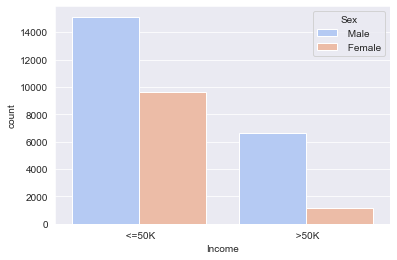

In [25]:
# performing data visualizaion on Income vs Sex
sns.countplot(df['Income'], palette='coolwarm', hue='Sex', data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

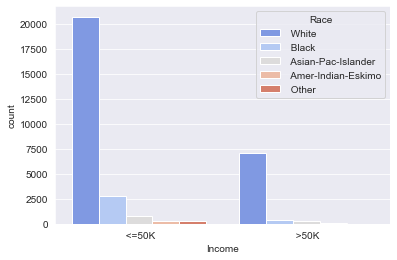

In [26]:
# performing data visualizaion on Income vs race
sns.countplot(df['Income'], palette='coolwarm', hue='Race', data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

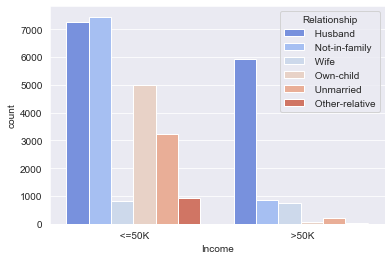

In [27]:
# performing data visualizaion on Income vs relationship
sns.countplot(df['Income'], palette='coolwarm', hue='Relationship', data=df)

In [28]:
# checking the numerical and categorical columns
numeric_col=list(df.select_dtypes(include=np.number).columns)

categorical_col=list(df.select_dtypes(include=object).columns)

In [29]:
numeric_col

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [30]:
categorical_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

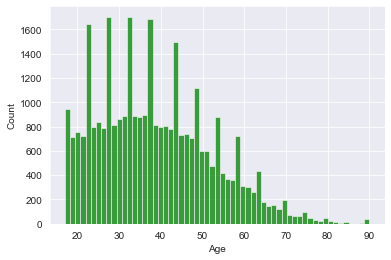

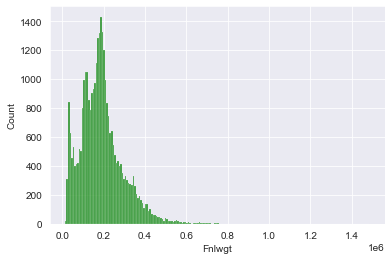

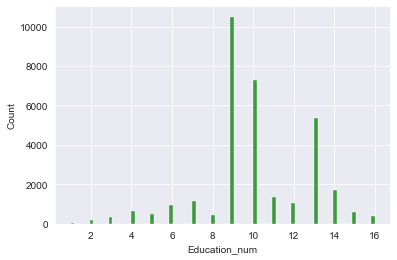

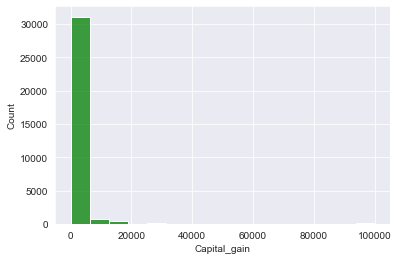

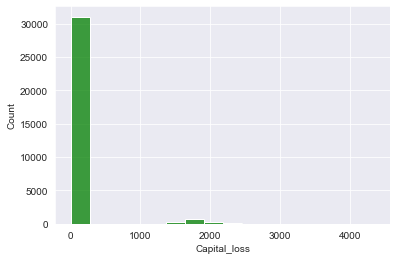

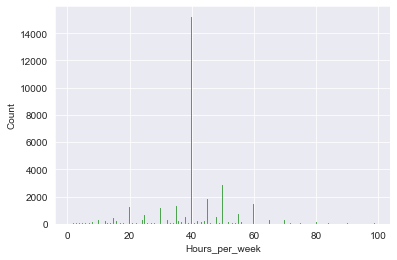

In [31]:
# visualizing numeric data
for col in numeric_col:
    sns.histplot(x=df[col], palette='PuBu', color='green')
    plt.show()

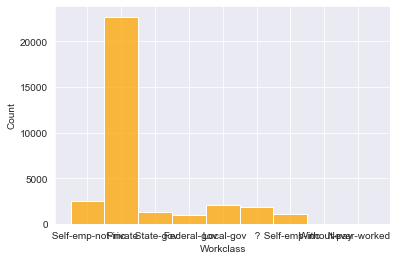

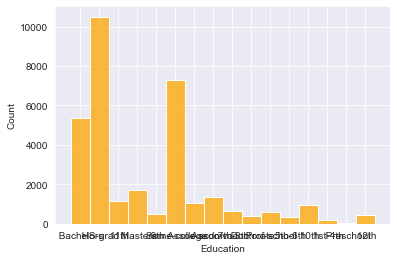

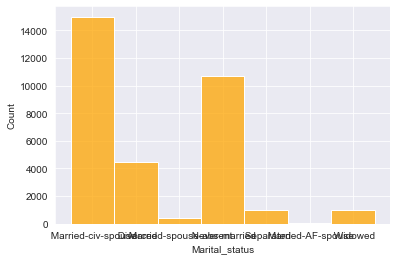

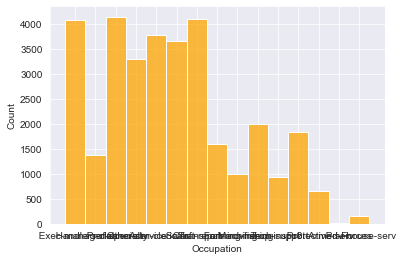

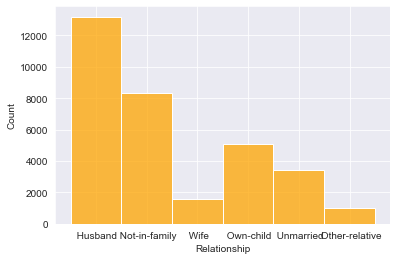

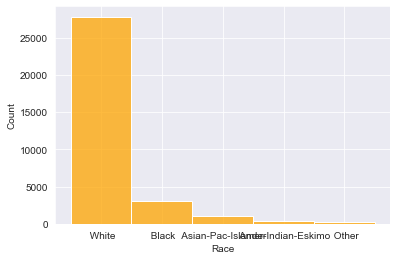

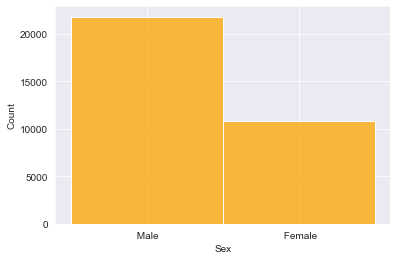

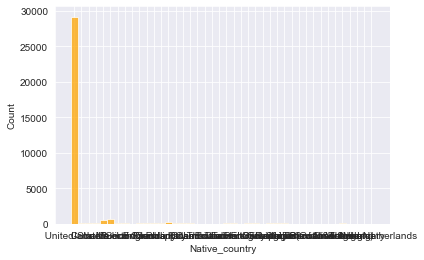

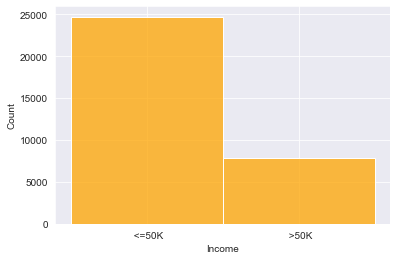

In [32]:
# visualizing categorical data
for col in categorical_col:
    sns.histplot(x=df[col], palette='PuBu', color='orange')
    plt.show()

In [33]:
# filling the ? values. Replacing the values with mode

df['Workclass']=df['Workclass'].replace('?','Private')
df['Occupation']=df['Occupation'].replace('?','prof_speciality')
df['Native_country']=df['Native_country'].replace('?','United-States')


In [34]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [35]:
# tuning features
df["Education"].replace({"Preschool":"School", "1st-4th":"School", "5th-6th":"School","7th-8th":"School","9th":"School","10th":"School","11th":"School","12th":"School", "Hs-grad":"High school", 
                        "Assoc-voc": "Higher", "Assoc-acdm":"Higher","Prof-school":"Higher","Some-college":"Higher", "Bachelors":"Undergrad","Masters":"Grad","Doctorate":"Doc"}, inplace=True)




In [36]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [37]:
# Tuning feature Marital_status
df['Marital_status']=df['Marital_status'].replace(['Married-civ-spouse', 'Married-AF-absent'], 'Married')
df['Marital_status']=df['Marital_status'].replace(['Never-married'], 'Not-married')
df['Marital_status']=df['Marital_status'].replace(['Divorced','Separated','Widowed', 'Married-spouse-absent'], 'Others')
df


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
# Tuning feature Income
df.Income=df.Income.replace('<=50K',0)
df.Income=df.Income.replace('>50K',1)



In [39]:
df.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [40]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [41]:
# checking the corelation of the given data set
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

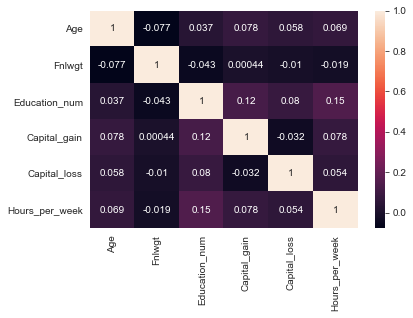

In [42]:
# using the data visualization to show correlation
sns.heatmap(df.corr(), annot=True)

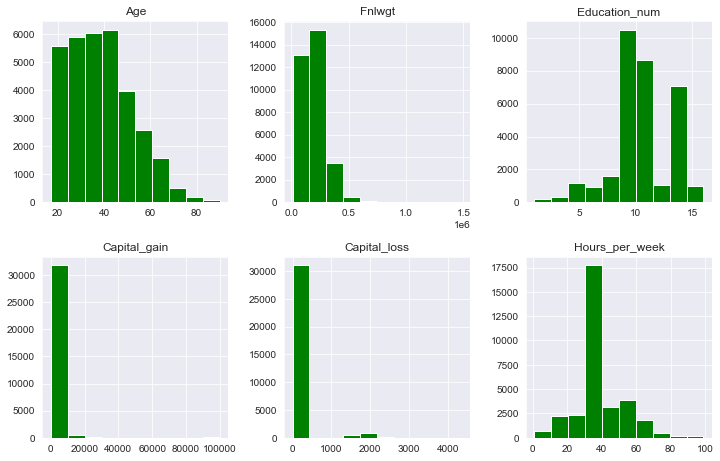

In [43]:
# showing the shape of the data through visualization
df.hist(figsize=(12,12), layout=(3,3), sharex=False, color='green');

Age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Education_num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Capital_gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Capital_loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Hours_per_week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

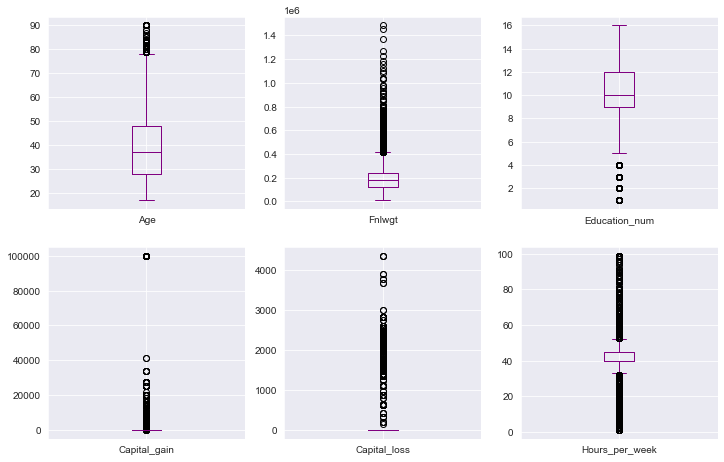

In [44]:
# to check the outliers for the given data set
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True, color='purple')

<AxesSubplot:xlabel='Race', ylabel='count'>

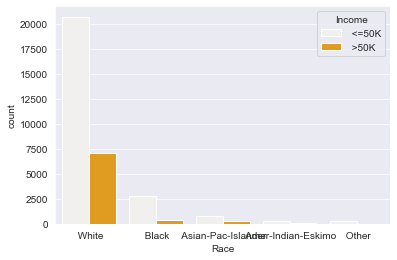

In [45]:
# visual graphical representation of categorical data race vs income
sns.countplot(df['Race'], hue='Income',data=df, color='orange')

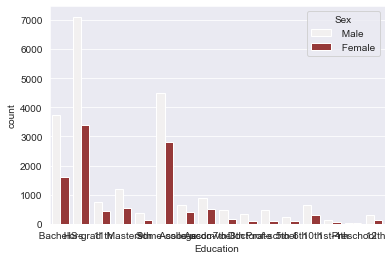

In [46]:
# visual graphical representation of categorical data Sex vs Education
sns.countplot(df['Education'], hue='Sex',data=df, color='brown')
plt.show()

In [47]:
# model building
X=df.drop(['Income'], axis=1)
y=df['Income']

In [48]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [49]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object

In [50]:
# converting categorical data into numerical data using Label Encoder Attrition data
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)
y


array([0, 0, 0, ..., 0, 0, 1])

In [51]:
# converting categorical data into numerical data using get_dummies
X=pd.get_dummies(X,drop_first=True)
X

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [52]:
# training and testing the data
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1, test_size=0.3)

In [53]:
#using scaler technique to fine tune features transformation technique
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [54]:
X_train.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.251095,-1.573924,1.518084,-0.147405,5.228204,1.586361,-0.170384,-0.265896,-0.014813,-1.518573,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,-2.938220,-0.04782,-0.024792
1,-0.338703,-0.775047,1.130927,-0.147405,-0.218094,0.773309,-0.170384,-0.265896,-0.014813,0.658513,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792
2,0.545994,1.323980,-0.030542,-0.147405,-0.218094,-0.039743,-0.170384,-0.265896,-0.014813,0.658513,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792
3,-0.707327,0.853771,-0.030542,-0.147405,-0.218094,-0.039743,-0.170384,-0.265896,-0.014813,0.658513,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792
4,0.029921,-0.206252,-0.417698,-0.147405,-0.218094,2.399413,-0.170384,-0.265896,-0.014813,-1.518573,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792


In [55]:
X_test.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.840894,0.051854,-0.417698,-0.147405,-0.218094,0.366783,-0.170384,-0.265896,-0.014813,0.658513,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792
1,3.200088,2.017934,-0.417698,-0.147405,-0.218094,-3.048035,-0.170384,-0.265896,-0.014813,-1.518573,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792
2,-0.043804,-0.000230,-0.417698,-0.147405,-0.218094,-0.039743,5.869101,-0.265896,-0.014813,-1.518573,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792
3,0.324820,0.244723,1.518084,-0.147405,-0.218094,-0.283658,-0.170384,3.760876,-0.014813,-1.518573,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792
4,-0.559878,-0.852361,1.518084,-0.147405,-0.218094,0.773309,-0.170384,-0.265896,-0.014813,0.658513,...,-0.030368,-0.060821,-0.019875,-0.049183,-0.040324,-0.022952,-0.022952,0.340342,-0.04782,-0.024792


In [56]:
# model building using Logistic Regression
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print("Accuracy on training data:{:,.3f}".format(lr.score(X_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(lr.score(X_test,y_test)))

Accuracy on training data:0.856
Accuracy on test data:0.845


In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
metrics.confusion_matrix(y_test, y_pred)

array([[6905,  548],
       [ 967, 1348]], dtype=int64)

<AxesSubplot:>

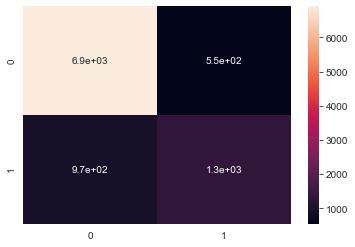

In [59]:
# ploting heatmap to show graphocal represntation
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [60]:
# checking accuracy score on test data and classification report
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8449017199017199
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7453
           1       0.71      0.58      0.64      2315

    accuracy                           0.84      9768
   macro avg       0.79      0.75      0.77      9768
weighted avg       0.84      0.84      0.84      9768



In [61]:
# model building using Support Vector Machine
from sklearn import svm
from sklearn.svm import SVC

In [62]:
sv=svm.SVC()
sv.fit(X_train, y_train)
y_pred=sv.predict(X_test)
print("Accuracy on training data:{:,.3f}".format(sv.score(X_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(sv.score(X_test,y_test)))

Accuracy on training data:0.865
Accuracy on test data:0.844


In [63]:
metrics.confusion_matrix(y_test, y_pred)

array([[6974,  479],
       [1048, 1267]], dtype=int64)

<AxesSubplot:>

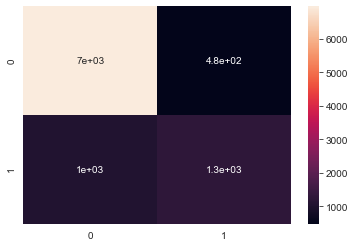

In [64]:
# ploting heatmap to show graphical represntation
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [65]:
# checking accuracy score on test data and classification report
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8436732186732187
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7453
           1       0.73      0.55      0.62      2315

    accuracy                           0.84      9768
   macro avg       0.80      0.74      0.76      9768
weighted avg       0.84      0.84      0.84      9768



In [72]:
# model building using Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print("Accuracy on training data:{:,.3f}".format(rfc.score(X_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(rfc.score(X_test,y_test)))

Accuracy on training data:0.847
Accuracy on test data:0.842


In [73]:
metrics.confusion_matrix(y_test, y_pred)

array([[7202,  251],
       [1293, 1022]], dtype=int64)

<AxesSubplot:>

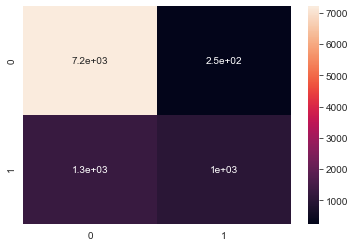

In [74]:
# ploting heatmap to show graphical represntation
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [75]:
# checking accuracy score on test data and classification report
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8419328419328419
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      7453
           1       0.80      0.44      0.57      2315

    accuracy                           0.84      9768
   macro avg       0.83      0.70      0.74      9768
weighted avg       0.84      0.84      0.82      9768



In [77]:
# model building using decisiontree classifier
dtc=DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)
print("Accuracy on training data:{:,.3f}".format(dtc.score(X_train,y_train)))
print("Accuracy on test data:{:,.3f}".format(dtc.score(X_test,y_test)))

Accuracy on training data:0.856
Accuracy on test data:0.850


In [78]:
metrics.confusion_matrix(y_test, y_pred)

array([[7106,  347],
       [1120, 1195]], dtype=int64)

In [79]:
# checking accuracy score on test data and classification report
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8498157248157249
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7453
           1       0.77      0.52      0.62      2315

    accuracy                           0.85      9768
   macro avg       0.82      0.73      0.76      9768
weighted avg       0.84      0.85      0.84      9768



In [80]:
'''Conclusion: Comparing four models Suport Vector Machine(SVM) and Logistic Regression, Random Forest Classifier and DecisionTreeClassifier.
Accuracy score on test data for Logistic Regression:0.845, Accuracy score on test data for Support Vector Machine: 0.844.
Accuracy score on test data for Random Forest Classifier: 0.842. Accuracy score on test data for DecisionTreeClassifier:.850
So we can choose Decision Tree classifier for model building.'''

'Conclusion: Comparing four models Suport Vector Machine(SVM) and Logistic Regression, Random Forest Classifier and DecisionTreeClassifier.\nAccuracy score on test data for Logistic Regression:0.845, Accuracy score on test data for Support Vector Machine: 0.844.\nAccuracy score on test data for Random Forest Classifier: 0.842. Accuracy score on test data for DecisionTreeClassifier:.850\nSo we can choose Decision Tree classifier for model building.'